In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from google.colab import files
#uploaded = files.upload()

In [0]:

#import io

#FILENAME = "./category_sample.csv"
FILENAME = "complete_category_data.csv"

#df = pd.read_csv(io.BytesIO(uploaded[FILENAME]))
df = pd.read_csv(FILENAME)
df.head()




In [0]:
df.describe()

In [0]:
df.isnull().values.any()

In [0]:
X = df['title_desc']
y = df['class']

print (X.shape)
print (y.shape)

In [0]:
X

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['title_desc'])
y = list(df['class'])



I tried lowering the vocabulary words features so that naive bayes could run, but even at this point it wouldn't work. 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.4, random_state=0)

In [0]:
# Training
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Testing
LR_pred = LR.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,LR_pred)

0.6265253585637391

In [0]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,LR_pred))

                                      precision    recall  f1-score   support

       Arts, Culture & Entertainment       0.51      0.65      0.57      9042
                    Business_FINANCE       0.54      0.32      0.41      2728
                               Crime       0.60      0.40      0.48      1201
                           Education       0.52      0.25      0.34       763
                         Environment       0.66      0.10      0.17       465
                  Family & Parenting       0.65      0.64      0.65      4565
                        Food & drink       0.67      0.51      0.58      2953
                 Health and Filtness       0.58      0.78      0.67      8623
Home and Living lifestyle and beauty       0.69      0.68      0.69      5738
                               Media       0.54      0.17      0.26       989
                            Politics       0.69      0.82      0.75     11610
                            Religion       0.66      0.09      

In [0]:
X_train.todense()


matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train,Y_train)

TypeError: ignored

In [0]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
XGB_pred = XGB.predict(X_test)

In [0]:
accuracy_score(Y_test,XGB_pred)

0.5742870515863729

In [0]:
from sklearn.svm import SVC
SVC_model = SVC()
SVC_model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
SVC_pred = SVC_model.predict(X_test)

In [0]:
accuracy_score(Y_test,SVC_pred)

0.23810638226739328

In [0]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
DT_pred = DT.predict(X_test)

In [0]:
accuracy_score(Y_test,DT_pred)

0.4373140316271606

In [0]:
print(classification_report(Y_test,DT_pred))

                                      precision    recall  f1-score   support

       Arts, Culture & Entertainment       0.37      0.42      0.40      9042
                    Business_FINANCE       0.20      0.18      0.19      2728
                               Crime       0.25      0.23      0.24      1201
                           Education       0.18      0.15      0.16       763
                         Environment       0.13      0.10      0.11       465
                  Family & Parenting       0.48      0.46      0.47      4565
                        Food & drink       0.36      0.36      0.36      2953
                 Health and Filtness       0.46      0.49      0.47      8623
Home and Living lifestyle and beauty       0.51      0.51      0.51      5738
                               Media       0.11      0.10      0.10       989
                            Politics       0.62      0.63      0.62     11610
                            Religion       0.10      0.08      

In [0]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
RF_pred = RF.predict(X_test)

In [0]:
accuracy_score(Y_test,RF_pred)

0.5333489351743506

In [0]:
print(classification_report(Y_test,RF_pred))

                                      precision    recall  f1-score   support

       Arts, Culture & Entertainment       0.39      0.61      0.47      9042
                    Business_FINANCE       0.31      0.17      0.22      2728
                               Crime       0.44      0.27      0.34      1201
                           Education       0.36      0.13      0.19       763
                         Environment       0.56      0.09      0.15       465
                  Family & Parenting       0.57      0.59      0.58      4565
                        Food & drink       0.50      0.39      0.44      2953
                 Health and Filtness       0.48      0.66      0.56      8623
Home and Living lifestyle and beauty       0.63      0.59      0.61      5738
                               Media       0.32      0.06      0.11       989
                            Politics       0.67      0.75      0.71     11610
                            Religion       0.33      0.06      

# Comparison

In [0]:
LR_ACC = accuracy_score(Y_test,LR_pred)
#NB_ACC = accuracy_score(Y_test,NB_pred)
XGB_ACC = accuracy_score(Y_test,XGB_pred)
SVC_ACC = accuracy_score(Y_test,SVC_pred)
DT_ACC = accuracy_score(Y_test,DT_pred)
RF_ACC = accuracy_score(Y_test,RF_pred)

In [0]:
[LR_ACC, NB_ACC, XGB_ACC, SVC_ACC, DT_ACC, RF_ACC]

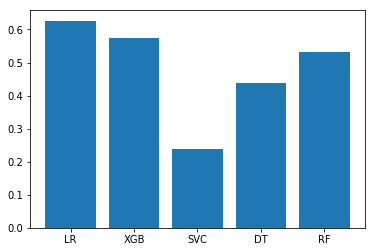

In [0]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig, ax = plt.subplots()
ax.set_xticks(np.arange(5))
ax.set_xticklabels(["LR","XGB","SVC","DT","RF"])
plt.bar(range(5),[LR_ACC, XGB_ACC, SVC_ACC, DT_ACC, RF_ACC])
plt.show()

In [0]:
from sklearn.ensemble import VotingClassifier
voter = VotingClassifier(estimators=[('lr',LR),('XGB',XGB),('RF',RF)],voting='soft')
voter.fit(X_train,Y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=0, solver='warn',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('XGB',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample...
                                                     clas

In [0]:
voter_pred = voter.predict(X_test)

In [0]:
accuracy_score(Y_test,voter_pred)

0.6126174317140851

Ensemble of Linear Regression, RandomForest and XGBoost had the best accuracy result of 61%. The result would be much higher if I had more processing resources and techniques.